In [24]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nlp = spacy.load('en_core_web_sm')

In [10]:
import pandas as pd

# Try different encodings
encodings_to_try = ['latin-1', 'ISO-8859-1', 'utf-16']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('Topic_Modelling/articles.csv', encoding=encoding)
        # If reading succeeds, break the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to read using {encoding} encoding")

# Continue with further processing of 'df' here if it's read successfully


In [11]:
df.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning



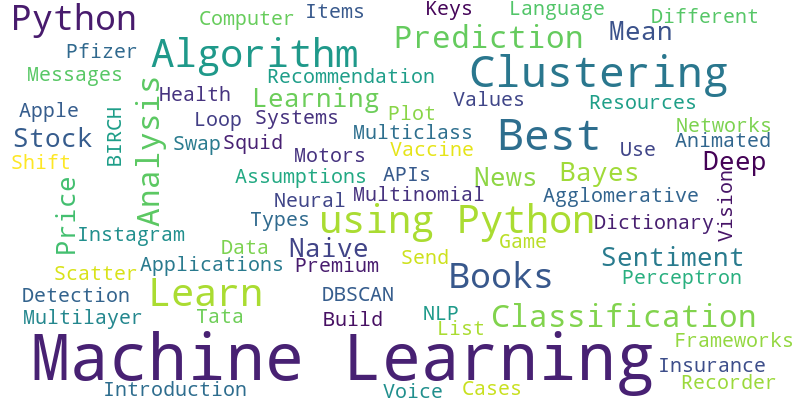

In [18]:
titles_text = ' '.join(df['Title'])
#print(titles_text)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the Word Cloud
fig = px.imshow(wordcloud, title='Word Cloud of Titles')
fig.update_layout(showlegend=False)
fig.show()

In [20]:
df['Sentiment'] = df['Article'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment Distribution
fig = px.histogram(df, x='Sentiment', title='Sentiment Distribution')
fig.show()

In [31]:
def extract_named_entities(text):
    doc = nlp(text)
    entities = defaultdict(list)
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)
    return dict(entities)

df['Named_Entities'] = df['Article'].apply(extract_named_entities)
print(df.head())

# Visualize NER
entity_counts = Counter(entity for entities in df['Named_Entities'] for entity in entities)
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index').reset_index()
entity_df.columns = ['Entity', 'Count']

fig = px.bar(entity_df.head(10), x='Entity', y='Count', title='Top 10 Named Entities')
fig.show()

                                             Article  \
0  Data analysis is the process of inspecting and...   
1  The performance of a machine learning algorith...   
2  You must have seen the news divided into categ...   
3  When there are only two classes in a classific...   
4  The Multinomial Naive Bayes is one of the vari...   

                                               Title  Sentiment  \
0                  Best Books to Learn Data Analysis   0.666667   
1         Assumptions of Machine Learning Algorithms   0.020833   
2          News Classification with Machine Learning   0.600000   
3  Multiclass Classification Algorithms in Machin...   0.625000   
4        Multinomial Naive Bayes in Machine Learning  -0.101429   

                                      Named_Entities  
0                                {'DATE': ['today']}  
1                                                 {}  
2                                                 {}  
3        {'CARDINAL': ['only two', 'more

In [34]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(df['Article'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tf)

# Visualize topics
topic_names = ["Topic " + str(i) for i in range(lda_model.n_components)]
df['Dominant_Topic'] = [topic_names[i] for i in lda_topic_matrix.argmax(axis=1)]

fig = px.bar(df['Dominant_Topic'].value_counts().reset_index(), x='index', y='Dominant_Topic', title='Topic Distribution')
fig.show()